## 컬럼들의 의미
- Row ID : 데이터 순서
- Order ID : 주문 번호
- Order Date : 주문 날짜
- Ship Date : 배송 날짜
- Ship Mode : 배송 모드 
- Customer ID : 고객 ID
- Customer Name : 고객명
- Segment : 고객 상태 (고객, 회사, 재택근무사무실)
- Country : 나라
- City : 도시 
- State : 주 
- Postal Code : 우편번호
- Region : 동서남북
- Product ID : 제품 ID
- Category : 상품 분류 
- Sub-Categroy : 상품 소분류
- Procuct Name : 상품명
- Sales : 매상
- Quantity : 수량
- Discount : 할인
- Profit : 이윤

In [1]:
# module import
# %load my__init.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy import NaN as NA
import re
import seaborn as sns
from operator import itemgetter, attrgetter

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 원본 dataframe 읽기 -> 2014~2017 : 4개년 데이터
df = pd.read_excel("Sample - Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## 1. 월별 구매건수/구매금액(합산) 그래프 그리기

In [3]:
# 날짜로 묶어서 구매 건수와 구매금액을 구한다.
df2 = pd.DataFrame(df.groupby('Order Date').count()['Row ID'])
df2['매출'] = df.groupby('Order Date').sum()['Sales']
df2.columns = ['구매건수','매출']
df2

,구매건수,매출
Order Date,,
2014-01-03,1,16.4480
2014-01-04,3,288.0600
2014-01-05,1,19.5360
2014-01-06,9,4407.1000
2014-01-07,2,87.1580
...,...,...
2017-12-26,4,814.5940
2017-12-27,2,177.6360
2017-12-28,19,1657.3508


In [4]:
# 월별로 묶은 뒤 합을 구한다.
df3 = df2.resample('M').sum()

In [5]:
# 연도로 묶은 뒤 리스트화 한다. -> 총 4개의 리스트 원소 나옴
g3 = df3.groupby(pd.Grouper( freq='Y'))
dfs3 = [group for _,group in g3]
dfs3

[            구매건수          매출
 Order Date                  
 2014-01-31    79  14236.8950
 2014-02-28    46   4519.8920
 2014-03-31   157  55691.0090
 2014-04-30   135  28295.3450
 2014-05-31   122  23648.2870
 2014-06-30   135  34595.1276
 2014-07-31   143  33946.3930
 2014-08-31   153  27909.4685
 2014-09-30   268  81777.3508
 2014-10-31   159  31453.3930
 2014-11-30   318  78628.7167
 2014-12-31   278  69545.6205,
             구매건수          매출
 Order Date                  
 2015-01-31    58  18174.0756
 2015-02-28    64  11951.4110
 2015-03-31   138  38726.2520
 2015-04-30   160  34195.2085
 2015-05-31   146  30131.6865
 2015-06-30   138  24797.2920
 2015-07-31   140  28765.3250
 2015-08-31   159  36898.3322
 2015-09-30   293  64595.9180
 2015-10-31   166  31404.9235
 2015-11-30   324  75972.5635
 2015-12-31   316  74919.5212,
             구매건수          매출
 Order Date                  
 2016-01-31    89  18542.4910
 2016-02-29    83  22978.8150
 2016-03-31   163  51715.8750
 2016-04

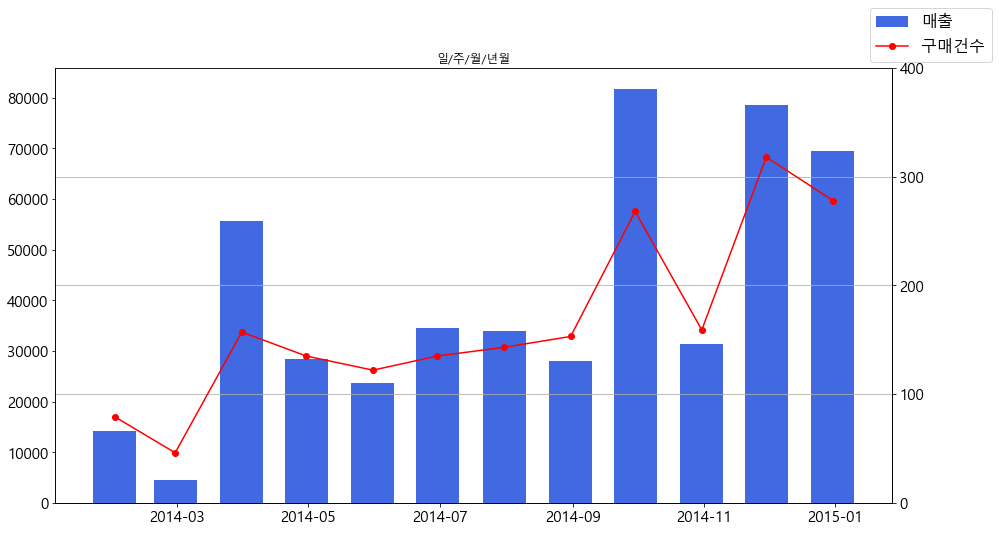

In [6]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax1 = plt.subplots(1,1)
plt.xticks(fontsize=15)

# dfs3[i]의 i를 바꾸면서 그림가능
ax1.bar(dfs3[0].index, dfs3[0]['매출'], color='royalblue',label='매출', width=20) 
ax1.tick_params(axis = 'y', labelsize =15)
ax2 = ax1.twinx()
ax2.plot(dfs3[0].index, dfs3[0]['구매건수'],color='red',label='구매건수', marker='o')
ax2.set_yticks([i*100 for i in range(5)])
ax2.tick_params(axis = 'y', labelsize =15)


plt.rc('legend', fontsize=16)
plt.grid(True, axis='y')
plt.title('일/주/월/년월')
fig.legend()
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## 2. 누적 구매횟수별 분석 -> Stacked Bar 로 시각화

In [8]:
# DF상에 표기된 유저당 총 구매횟수와 매출합
df_user = pd.DataFrame(df.groupby(['Customer ID']).count()['Sales'])
df_user['매출'] = df.groupby(['Customer ID']).sum()['Sales']
df_user.columns = ['유저별 총 구매횟수','매출']
df_user

,유저별 총 구매횟수,매출
Customer ID,,
AA-10315,11,5563.560
AA-10375,15,1056.390
AA-10480,12,1790.512
AA-10645,18,5086.935
AB-10015,6,886.156
...,...,...
XP-21865,28,2374.658
YC-21895,8,5454.350
YS-21880,12,6720.444


In [9]:
# 원본데이터와 합친다.
df_user_final = pd.merge(df,df_user, on=['Customer ID']) # 고객명이 키가 된다.
df_user_final.drop(['매출'],axis=1,inplace=True) # 매출 컬럼은 삭제
df_user_final['주문년도/월'] = df_user_final['Order Date'].dt.strftime('%Y-%m') # 주문날짜(년-월)컬럼생성
df_user_final

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,유저별 총 구매횟수,주문년도/월
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,5,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,5,2016-11
2,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160,5,2017-01
3,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,FUR-FU-10004952,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,6,0.6,-95.2476,5,2015-10
4,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,OFF-PA-10003001,Office Supplies,Paper,Xerox 1986,5.344,1,0.2,1.8704,5,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9560,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,195.640,5,0.2,-44.0190,6,2016-05
9990,9561,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,FUR-FU-10001876,Furniture,Furnishings,"Computer Room Manger, 14""",51.968,2,0.2,10.3936,6,2016-05
9991,9562,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,TEC-AC-10002637,Technology,Accessories,Logitech VX Revolution Cordless Laser Mouse fo...,431.976,3,0.2,-75.5958,6,2016-05
9992,9563,CA-2016-129280,2016-05-03,2016-05-05,First Class,SM-20905,Susan MacKendrick,Consumer,United States,Newark,...,TEC-MA-10003589,Technology,Machines,Cisco 8961 IP Phone Charcoal,224.937,3,0.7,-164.9538,6,2016-05


In [10]:
df_user_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
df_user2 = pd.DataFrame(df_user_final.groupby(['주문년도/월','유저별 총 구매횟수']).sum()['Sales'])
df_user3 = df_user2.unstack().T
df_user3 = df_user3.fillna(0) # 결측치 0 대입
df_user3

주문년도/월             2014-01   2014-02    2014-03   2014-04   2014-05  \
      유저별 총 구매횟수                                                      
Sales 1              0.000     0.000      0.000     0.000     0.000   
      2              0.000     0.000      0.000     0.000     0.000   
      3              0.000     0.000      0.000    68.692  3348.520   
      4             44.008     0.000   1678.090     0.000    46.800   
      5             40.544     0.000     10.500   293.478     0.000   
      6             19.440    12.624    369.832    59.920   184.280   
      7              0.000   291.492    139.940     0.000  1171.775   
      8            663.778   321.560   1895.715  1985.981   322.400   
      9            355.530    17.248    749.129  2334.848   134.184   
      10           522.196   477.940   1163.490   286.034   997.472   
      11          2099.900     0.000   1953.060  4509.672  4263.475   
      12           445.788    29.136   2296.561  1132.618  1156.615   
      13            18.720   117.136   5252.680   384.200  2874.314   
      14             0.000  1720.680    995.242  2150.202  1242.428   
      15            93.490    12.350  35475.866  1705.152   765.494   
      16            40.846     0.000      7.980     0.000   245.860   
      17           341.660   160.272    648.352   799.910   535.482   
      18           545.940    19.456    590.762  2440.610  2621.656   
      19             0.000     8.850    521.870  2689.098   855.344   
      20          1679.749   560.550    574.194   371.556   576.234   
      21           944.610    40.800      0.000  2015.910   460.850   
      22          4374.880   664.838    221.218     0.000     0.000   
      23             0.000     0.000    583.358   844.986  1213.494   
      24             0.000     0.000      0.000   592.568     0.000   
      25             0.000     0.000      0.000    32.400   116.280   
      26             0.000     0.000     13.456   661.504   235.770   
      27             0.000     0.000     60.080     7.830     0.000   
      28          1995.876    64.960    404.550   743.762     0.000   
      29             0.000     0.000      0.000     0.000   279.560   
      30             0.000     0.000      0.000     0.000     0.000   
      31             0.000     0.000      0.000     0.000     0.000   
      32             9.940     0.000     85.084  1860.956     0.000   
      34             0.000     0.000      0.000   323.458     0.000   
      37             0.000     0.000      0.000     0.000     0.000   

주문년도/월              2014-06   2014-07    2014-08     2014-09   2014-10  ...  \
      유저별 총 구매횟수                                                        ...   
Sales 1              0.0000     0.000     0.0000      0.0000     0.000  ...   
      2              0.0000     0.000     0.0000    143.9520   129.920  ...   
      3              0.0000     0.000     0.0000     60.5100     0.000  ...   
      4            334.6800     0.000    19.4400      0.0000     4.710  ...   
      5              0.0000   706.064     0.0000    709.5380   539.800  ...   
      6           1158.4480  1398.956   544.6520    794.7840   431.358  ...   
      7           1751.8880  1491.392   622.4200   5228.4760   540.704  ...   
      8            809.2280   276.280   423.5060    190.9310    54.474  ...   
      9            579.4880   242.368  3150.7565   2656.1910   995.396  ...   
      10          3691.2540  1011.888   947.5220   4197.1400  1091.236  ...   
      11          4727.1280   803.676  1586.3720   1107.8888  2325.898  ...   
      12           147.0480   824.146  2115.0600   1467.1980  1053.534  ...   
      13          1832.1050   908.582   869.8060   2545.7500  4565.068  ...   
      14          1373.4100  1422.346  5204.7060   7454.0820  1023.294  ...   
      15          4526.8320  1783.900  2434.0520   4292.2780  2721.978  ...   
      16             6.0800  2984.056  4481.7020  10949.4400  2769.463  ...   
      17          299

In [12]:
# 2014년 데이터를 이용 -> 시각화
df2014_1 = df_user3.iloc[:,:12]
df2014_1

주문년도/월             2014-01   2014-02    2014-03   2014-04   2014-05  \
      유저별 총 구매횟수                                                      
Sales 1              0.000     0.000      0.000     0.000     0.000   
      2              0.000     0.000      0.000     0.000     0.000   
      3              0.000     0.000      0.000    68.692  3348.520   
      4             44.008     0.000   1678.090     0.000    46.800   
      5             40.544     0.000     10.500   293.478     0.000   
      6             19.440    12.624    369.832    59.920   184.280   
      7              0.000   291.492    139.940     0.000  1171.775   
      8            663.778   321.560   1895.715  1985.981   322.400   
      9            355.530    17.248    749.129  2334.848   134.184   
      10           522.196   477.940   1163.490   286.034   997.472   
      11          2099.900     0.000   1953.060  4509.672  4263.475   
      12           445.788    29.136   2296.561  1132.618  1156.615   
      13            18.720   117.136   5252.680   384.200  2874.314   
      14             0.000  1720.680    995.242  2150.202  1242.428   
      15            93.490    12.350  35475.866  1705.152   765.494   
      16            40.846     0.000      7.980     0.000   245.860   
      17           341.660   160.272    648.352   799.910   535.482   
      18           545.940    19.456    590.762  2440.610  2621.656   
      19             0.000     8.850    521.870  2689.098   855.344   
      20          1679.749   560.550    574.194   371.556   576.234   
      21           944.610    40.800      0.000  2015.910   460.850   
      22          4374.880   664.838    221.218     0.000     0.000   
      23             0.000     0.000    583.358   844.986  1213.494   
      24             0.000     0.000      0.000   592.568     0.000   
      25             0.000     0.000      0.000    32.400   116.280   
      26             0.000     0.000     13.456   661.504   235.770   
      27             0.000     0.000     60.080     7.830     0.000   
      28          1995.876    64.960    404.550   743.762     0.000   
      29             0.000     0.000      0.000     0.000   279.560   
      30             0.000     0.000      0.000     0.000     0.000   
      31             0.000     0.000      0.000     0.000     0.000   
      32             9.940     0.000     85.084  1860.956     0.000   
      34             0.000     0.000      0.000   323.458     0.000   
      37             0.000     0.000      0.000     0.000     0.000   

주문년도/월              2014-06   2014-07    2014-08     2014-09   2014-10  \
      유저별 총 구매횟수                                                         
Sales 1              0.0000     0.000     0.0000      0.0000     0.000   
      2              0.0000     0.000     0.0000    143.9520   129.920   
      3              0.0000     0.000     0.0000     60.5100     0.000   
      4            334.6800     0.000    19.4400      0.0000     4.710   
      5              0.0000   706.064     0.0000    709.5380   539.800   
      6           1158.4480  1398.956   544.6520    794.7840   431.358   
      7           1751.8880  1491.392   622.4200   5228.4760   540.704   
      8            809.2280   276.280   423.5060    190.9310    54.474   
      9            579.4880   242.368  3150.7565   2656.1910   995.396   
      10          3691.2540  1011.888   947.5220   4197.1400  1091.236   
      11          4727.1280   803.676  1586.3720   1107.8888  2325.898   
      12           147.0480   824.146  2115.0600   1467.1980  1053.534   
      13          1832.1050   908.582   869.8060   2545.7500  4565.068   
      14          1373.4100  1422.346  5204.7060   7454.0820  1023.294   
      15          4526.8320  1783.900  2434.0520   4292.2780  2721.978   
      16             6.0800  2984.056  4481.7020  10949.4400  2769.463   
      17          2993.2406   148.264    93.0240   7462.7180    36.360   
      18          2336.9000   990.190

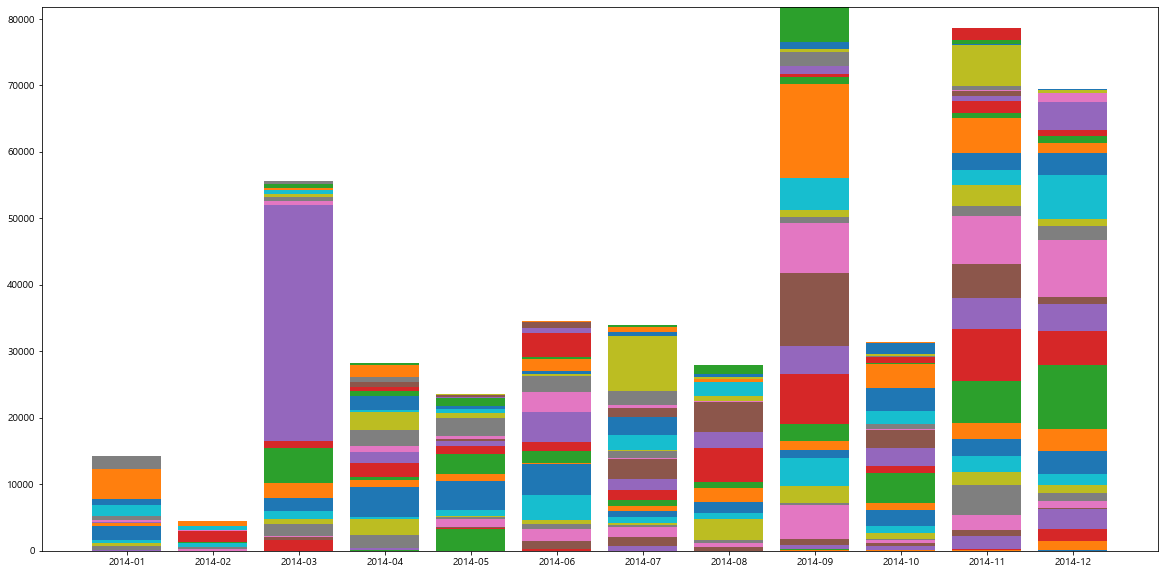

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
width=0.35
ax.bar(df2014_1.columns, df2014_1.iloc[0,:],label='1번 구매자')
for i in range(1,34) :
    ax.bar(df2014_1.columns, df2014_1.iloc[i,:], bottom=df2014_1.iloc[0:i,:].sum(axis=0))

plt.show()

## 3. 구매횟수별 분석 -> Stacked Bar 로 시각화
- 2번에서는 유저당 누적 등장횟수로 그림을 그렸다면, 여기서는 등장할때마다 번호를 매겨 매 구매 건에 대해 랭크를 매김

In [14]:
# Rank라는 열을 추가 -> 등장할 때 마다 순서를 매김
df['Rank'] = df.groupby('Customer ID')['Order Date'].rank(method='first')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Rank
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,4.0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1.0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1.0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1.0
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,6.0
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.0
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,8.0


In [15]:
# 주문년도/월 컬럼 추가
df['주문년도/월'] = df['Order Date'].dt.strftime('%Y-%m')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Rank,주문년도/월
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3.0,2016-11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,4.0,2016-11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1.0,2016-06
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1.0,2015-10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2.0,2015-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,1.0,2014-01
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,6.0,2017-02
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.0,2017-02
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,8.0,2017-02


In [16]:
df3 = df.groupby(['주문년도/월','Rank']).sum()['Sales'].to_frame().unstack().T
df3 = df3.droplevel(0, axis=0) # multi인덱스 제거
df3 = df3.fillna(0) # 결측치 = 0
df3

주문년도/월,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Rank,,,,,,,,,,,,,,,,,,,,,
1.0,6417.102,1648.776,17903.884,11382.626,11304.759,10468.1530,9647.146,11729.4060,15090.9220,5055.909,...,413.0800,12.3200,0.0000,47.9760,222.450,0.000,47.400,1547.8320,164.6880,0.0000
2.0,3054.947,1869.254,30145.355,6054.186,5774.704,7979.4240,12716.021,4258.2490,18133.7688,12122.116,...,584.7280,149.2730,65.4240,82.1620,1089.340,256.536,624.840,208.1060,207.7800,90.1760
3.0,916.498,423.942,4886.966,3699.368,3414.312,9058.1730,4020.680,6170.6005,9062.8410,6454.214,...,1801.5880,2682.5150,6.8740,1877.1420,663.870,317.892,1765.334,613.7220,2124.2890,706.1128
4.0,880.188,332.940,1527.532,1946.949,2442.750,2636.3570,1658.540,2459.5070,7965.2690,1586.558,...,1216.7840,1340.1940,859.7360,79.8840,2575.200,463.892,908.812,157.2560,2039.0140,610.4090
5.0,1573.810,60.852,657.392,4553.036,579.596,579.5850,1842.566,1194.9220,3163.6100,1321.626,...,1398.1820,1210.9740,1066.1900,2977.9740,2543.528,374.818,5139.605,1306.4650,10526.0080,1164.6880
6.0,1155.400,184.128,71.622,149.352,97.376,1970.2716,1009.550,318.1380,15194.2530,2287.966,...,452.1340,4883.5085,1333.6610,744.7470,2547.899,769.772,2979.006,3323.8480,4267.7380,2735.8250
7.0,209.250,0.000,498.258,227.976,34.790,938.0640,392.748,1068.3500,3042.4140,539.198,...,3281.7160,690.3540,2640.6970,2703.1510,1805.504,4442.248,5010.004,13975.8160,5526.8408,4208.5680
8.0,29.700,0.000,0.000,10.304,0.000,36.8120,1144.400,454.8760,3222.3750,971.862,...,3250.4580,2677.6240,4592.7510,1727.0180,2431.828,1891.820,6461.460,11013.2740,4734.6620,4063.7260
9.0,0.000,0.000,0.000,154.764,0.000,418.8000,1209.762,255.4200,3563.4500,768.334,...,2352.6030,5422.9960,2258.9680,1840.1580,2724.022,12095.910,5836.536,3107.9610,9899.5980,8836.2890


In [17]:
# 2014년도 데이터로 시각화
dff2014_2 = df3.iloc[:,:12]
dff2014_2

주문년도/월,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12
Rank,,,,,,,,,,,,
1.0,6417.102,1648.776,17903.884,11382.626,11304.759,10468.1530,9647.146,11729.4060,15090.9220,5055.909,17189.4160,8421.8690
2.0,3054.947,1869.254,30145.355,6054.186,5774.704,7979.4240,12716.021,4258.2490,18133.7688,12122.116,10511.9915,10758.3780
3.0,916.498,423.942,4886.966,3699.368,3414.312,9058.1730,4020.680,6170.6005,9062.8410,6454.214,7190.5600,12271.2480
4.0,880.188,332.940,1527.532,1946.949,2442.750,2636.3570,1658.540,2459.5070,7965.2690,1586.558,13631.0760,8635.6045
5.0,1573.810,60.852,657.392,4553.036,579.596,579.5850,1842.566,1194.9220,3163.6100,1321.626,11629.0542,5610.5370
6.0,1155.400,184.128,71.622,149.352,97.376,1970.2716,1009.550,318.1380,15194.2530,2287.966,7360.1620,6695.0520
7.0,209.250,0.000,498.258,227.976,34.790,938.0640,392.748,1068.3500,3042.4140,539.198,3449.8690,2858.6380
8.0,29.700,0.000,0.000,10.304,0.000,36.8120,1144.400,454.8760,3222.3750,971.862,3530.9600,2276.6280
9.0,0.000,0.000,0.000,154.764,0.000,418.8000,1209.762,255.4200,3563.4500,768.334,2111.5480,8165.6740


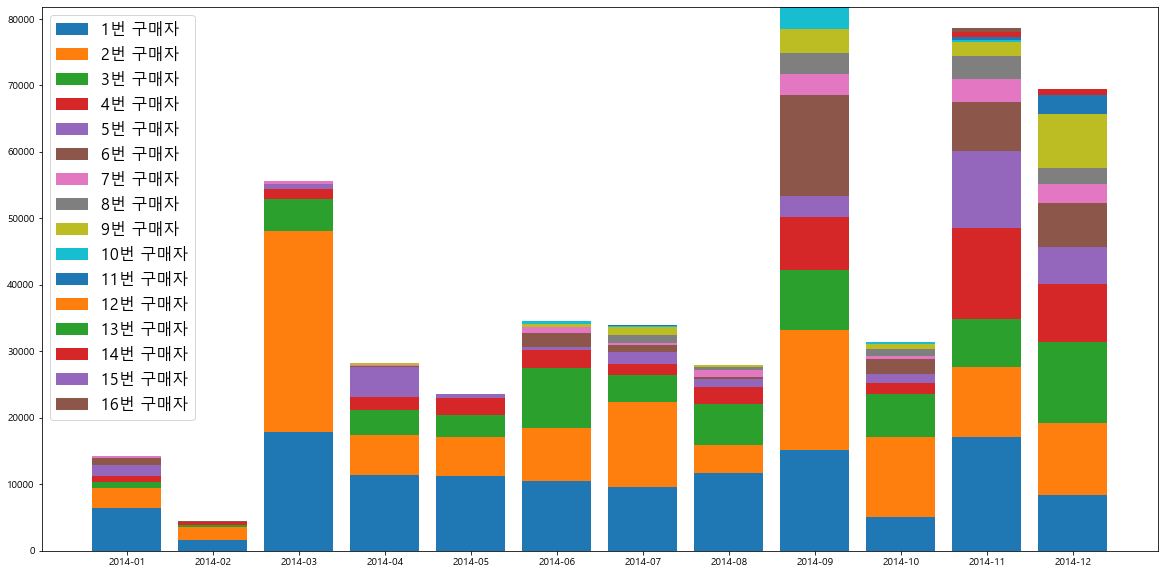

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
width=0.35
ax.bar(dff2014_2.columns, dff2014_2.iloc[0,:],label='1번 구매자')
for i in range(1,16) :
    ax.bar(dff2014_2.columns, dff2014_2.iloc[i,:], bottom=dff2014_2.iloc[0:i,:].sum(axis=0), label=f'{i+1}번 구매자')
    
plt.legend()
plt.show()

## 4. 코호트 재구매율

In [19]:
# 추가한 '주문년도/월' 컬럼이 문자열 형태이므로, datetime으로 변경
df['주문년도/월']=pd.to_datetime( df['주문년도/월'],format='%Y-%m') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [20]:
# 2014년도 데이터 추출
DF2014=df[df['주문년도/월'].dt.year==2014]
DF2014

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Rank,주문년도/월
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,1.0,2014-06-01
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,2.0,2014-06-01
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,3.0,2014-06-01
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,4.0,2014-06-01
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700,5.0,2014-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,9947,CA-2014-111157,2014-03-02,2014-03-06,Standard Class,NH-18610,Nicole Hansen,Corporate,United States,Philadelphia,...,TEC-AC-10004353,Technology,Accessories,Hypercom P1300 Pinpad,151.200,3,0.2,32.1300,2.0,2014-03-01
9956,9957,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,OFF-PA-10001776,Office Supplies,Paper,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",46.350,5,0.0,21.7845,4.0,2014-11-01
9957,9958,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,OFF-PA-10004039,Office Supplies,Paper,Xerox 1882,223.920,4,0.0,109.7208,5.0,2014-11-01
9958,9959,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,OFF-SU-10001574,Office Supplies,Supplies,Acme Value Line Scissors,7.300,2,0.0,2.1900,6.0,2014-11-01


In [21]:
# 2014년 구매자들 중에 첫 구매 날짜를 구하려 한다.
DF2014_first = DF2014[DF2014['Rank']==1][['Customer ID','주문년도/월']]
DF2014_first

,Customer ID,주문년도/월
5,BH-11710,2014-06-01
16,PK-19075,2014-11-01
17,AG-10270,2014-05-01
18,ZD-21925,2014-08-01
113,RC-19960,2014-08-01
...,...,...
9911,RP-19855,2014-04-01
9921,AT-10435,2014-11-01
9933,JK-15205,2014-07-01
9945,NH-18610,2014-03-01


In [22]:
# DF2014_final이라는 데이터 프레임 생성 -> 첫구매날짜를 붙힌다. 
DF2014_final = pd.merge(DF2014, DF2014_first, on =['Customer ID']) # 키 = 고객명
DF2014_final.drop(DF2014_final.iloc[:,0:5], axis=1, inplace=True) # 불필요컬럼 삭제
DF2014_final.drop(DF2014_final.iloc[:,1:17], axis=1, inplace=True) # 불필요컬럼 삭제
DF2014_final

,Customer ID,주문년도/월_x,주문년도/월_y
0,BH-11710,2014-06-01,2014-06-01
1,BH-11710,2014-06-01,2014-06-01
2,BH-11710,2014-06-01,2014-06-01
3,BH-11710,2014-06-01,2014-06-01
4,BH-11710,2014-06-01,2014-06-01
...,...,...,...
1988,RE-19450,2014-06-01,2014-06-01
1989,RP-19855,2014-04-01,2014-04-01
1990,JK-15205,2014-07-01,2014-07-01
1991,NH-18610,2014-03-01,2014-03-01


In [23]:
# columns 명 재설정
DF2014_final.columns = ['Customer ID','Order Date','First 0rder Date']
DF2014_final

,Customer ID,Order Date,First 0rder Date
0,BH-11710,2014-06-01,2014-06-01
1,BH-11710,2014-06-01,2014-06-01
2,BH-11710,2014-06-01,2014-06-01
3,BH-11710,2014-06-01,2014-06-01
4,BH-11710,2014-06-01,2014-06-01
...,...,...,...
1988,RE-19450,2014-06-01,2014-06-01
1989,RP-19855,2014-04-01,2014-04-01
1990,JK-15205,2014-07-01,2014-07-01
1991,NH-18610,2014-03-01,2014-03-01


In [24]:
# 첫구매날짜와 상품 구매날짜를 계산하여 날짜 차이 계산
DF2014_final['Diff'] = DF2014_final['Order Date'] -  DF2014_final['First 0rder Date']
DF2014_final.head(10)

,Customer ID,Order Date,First 0rder Date,Diff
0,BH-11710,2014-06-01,2014-06-01,0 days
1,BH-11710,2014-06-01,2014-06-01,0 days
2,BH-11710,2014-06-01,2014-06-01,0 days
3,BH-11710,2014-06-01,2014-06-01,0 days
4,BH-11710,2014-06-01,2014-06-01,0 days
5,BH-11710,2014-06-01,2014-06-01,0 days
6,BH-11710,2014-06-01,2014-06-01,0 days
7,BH-11710,2014-11-01,2014-06-01,153 days
8,BH-11710,2014-11-01,2014-06-01,153 days
9,PK-19075,2014-11-01,2014-11-01,0 days


In [25]:
# 두 달의 개월수 차이를 Month라는 컬럼으로 추가
DF2014_final['Month']= (DF2014_final['Order Date'].dt.year - DF2014_final['First 0rder Date'].dt.year)*12 + (DF2014_final['Order Date'].dt.month - DF2014_final['First 0rder Date'].dt.month)
DF2014_final.head(10)

,Customer ID,Order Date,First 0rder Date,Diff,Month
0,BH-11710,2014-06-01,2014-06-01,0 days,0
1,BH-11710,2014-06-01,2014-06-01,0 days,0
2,BH-11710,2014-06-01,2014-06-01,0 days,0
3,BH-11710,2014-06-01,2014-06-01,0 days,0
4,BH-11710,2014-06-01,2014-06-01,0 days,0
5,BH-11710,2014-06-01,2014-06-01,0 days,0
6,BH-11710,2014-06-01,2014-06-01,0 days,0
7,BH-11710,2014-11-01,2014-06-01,153 days,5
8,BH-11710,2014-11-01,2014-06-01,153 days,5
9,PK-19075,2014-11-01,2014-11-01,0 days,0


In [26]:
# tail 쪽 확인
DF2014_final.tail(20)

,Customer ID,Order Date,First 0rder Date,Diff,Month
1973,HK-14890,2014-06-01,2014-06-01,0 days,0
1974,MD-17350,2014-11-01,2014-11-01,0 days,0
1975,MD-17350,2014-11-01,2014-11-01,0 days,0
1976,MD-17350,2014-11-01,2014-11-01,0 days,0
1977,MD-17350,2014-11-01,2014-11-01,0 days,0
1978,MD-17350,2014-11-01,2014-11-01,0 days,0
1979,MD-17350,2014-12-01,2014-11-01,30 days,1
1980,MD-17350,2014-12-01,2014-11-01,30 days,1
1981,TW-21025,2014-12-01,2014-12-01,0 days,0
1982,SC-20305,2014-12-01,2014-12-01,0 days,0


In [27]:
grouped2 = DF2014_final.groupby(['First 0rder Date','Month'])

In [28]:
# 각 유저별로 구한다.
cohort2014 = grouped2['Customer ID'].nunique() 
cohort2014.head(10)

First 0rder Date  Month
2014-01-01        0        32
                  1         3
                  3         2
                  4         2
                  6         2
                  7         4
                  8         5
                  9         3
                  10        7
                  11        5
Name: Customer ID, dtype: int64

In [29]:
cohort2014 = cohort2014.to_frame() # 데이터프레임화
cohort2014

Customer ID
First 0rder Date Month             
2014-01-01       0               32
                 1                3
                 3                2
                 4                2
                 6                2
...                             ...
2014-10-01       1                3
                 2                5
2014-11-01       0               62
                 1               15
2014-12-01       0               49

[73 rows x 1 columns]

In [30]:
cohort2014.reset_index(inplace=True) # 인덱스 재설정

In [31]:
# 피벗을 이용하여 코호트 재구매율 표 구하기
cohort2014 = cohort2014.pivot(index='First 0rder Date', columns = 'Month')
cohort2014

Customer ID                                               \
Month                     0     1    2     3     4    5     6     7    8    
First 0rder Date                                                            
2014-01-01              32.0   3.0  NaN   2.0   2.0  NaN   2.0   4.0  5.0   
2014-02-01              24.0   4.0  2.0   1.0   NaN  2.0   2.0   3.0  3.0   
2014-03-01              65.0   4.0  2.0   8.0   7.0  NaN   7.0   5.0  8.0   
2014-04-01              56.0   6.0  2.0   4.0   3.0  8.0   6.0   9.0  8.0   
2014-05-01              56.0   5.0  5.0   4.0  10.0  2.0  12.0  10.0  NaN   
2014-06-01              48.0   1.0  2.0   4.0   2.0  9.0   8.0   NaN  NaN   
2014-07-01              44.0   6.0  5.0   NaN   5.0  8.0   NaN   NaN  NaN   
2014-08-01              49.0   8.0  3.0  11.0   5.0  NaN   NaN   NaN  NaN   
2014-09-01              68.0   9.0  9.0  11.0   NaN  NaN   NaN   NaN  NaN   
2014-10-01              42.0   3.0  5.0   NaN   NaN  NaN   NaN   NaN  NaN   
2014-11-01              62.0  15.0  NaN   NaN   NaN  NaN   NaN   NaN  NaN   
2014-12-01              49.0   NaN  NaN   NaN   NaN  NaN   NaN   NaN  NaN   

                                 
Month              9    10   11  
First 0rder Date                 
2014-01-01        3.0  7.0  5.0  
2014-02-01        4.0  4.0  NaN  
2014-03-01        6.0  NaN  NaN  
2014-04-01        NaN  NaN  NaN  
2014-05-01        NaN  NaN  NaN  
2014-06-01        NaN  NaN  NaN  
2014-07-01        NaN  NaN  NaN  
2014-08-01        NaN  NaN  NaN  
2014-09-01        NaN  NaN  NaN  
2014-10-01        NaN  NaN  NaN  
2014-11-01        NaN  NaN  NaN  
2014-12-01        NaN  NaN  NaN

In [32]:
cohort2014 = cohort2014.fillna(0)

In [33]:
# 확률 계산
user_retention2014 = cohort2014.div(cohort2014.iloc[:,0], axis=0)
user_retention2014

Customer ID                                          \
Month                     0         1         2         3         4    
First 0rder Date                                                       
2014-01-01               1.0  0.093750  0.000000  0.062500  0.062500   
2014-02-01               1.0  0.166667  0.083333  0.041667  0.000000   
2014-03-01               1.0  0.061538  0.030769  0.123077  0.107692   
2014-04-01               1.0  0.107143  0.035714  0.071429  0.053571   
2014-05-01               1.0  0.089286  0.089286  0.071429  0.178571   
2014-06-01               1.0  0.020833  0.041667  0.083333  0.041667   
2014-07-01               1.0  0.136364  0.113636  0.000000  0.113636   
2014-08-01               1.0  0.163265  0.061224  0.224490  0.102041   
2014-09-01               1.0  0.132353  0.132353  0.161765  0.000000   
2014-10-01               1.0  0.071429  0.119048  0.000000  0.000000   
2014-11-01               1.0  0.241935  0.000000  0.000000  0.000000   
2014-12-01               1.0  0.000000  0.000000  0.000000  0.000000   

                                                                              \
Month                   5         6         7         8         9         10   
First 0rder Date                                                               
2014-01-01        0.000000  0.062500  0.125000  0.156250  0.093750  0.218750   
2014-02-01        0.083333  0.083333  0.125000  0.125000  0.166667  0.166667   
2014-03-01        0.000000  0.107692  0.076923  0.123077  0.092308  0.000000   
2014-04-01        0.142857  0.107143  0.160714  0.142857  0.000000  0.000000   
2014-05-01        0.035714  0.214286  0.178571  0.000000  0.000000  0.000000   
2014-06-01        0.187500  0.166667  0.000000  0.000000  0.000000  0.000000   
2014-07-01        0.181818  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-08-01        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-09-01        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-10-01        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-11-01        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-12-01        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                           
Month                  11  
First 0rder Date           
2014-01-01        0.15625  
2014-02-01        0.00000  
2014-03-01        0.00000  
2014-04-01        0.00000  
2014-05-01        0.00000  
2014-06-01        0.00000  
2014-07-01        0.00000  
2014-08-01        0.00000  
2014-09-01        0.00000  
2014-10-01        0.00000  
2014-11-01        0.00000  
2014-12-01        0.00000

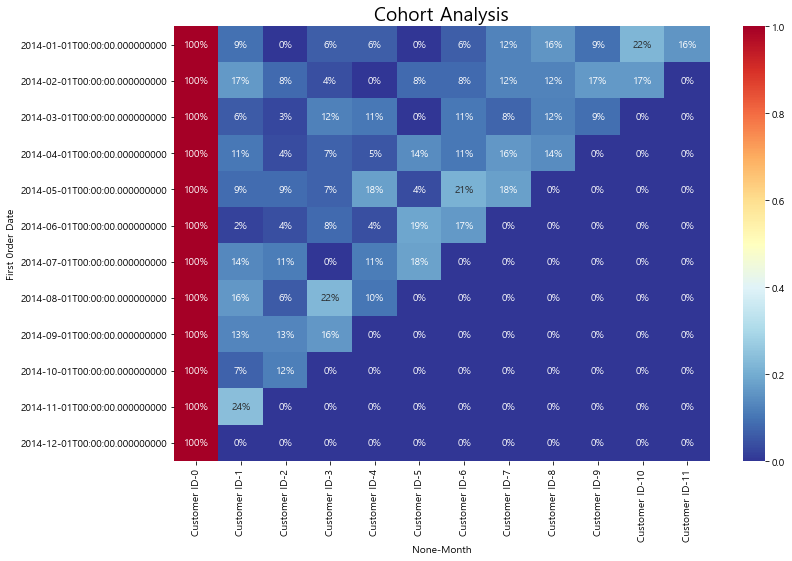

In [34]:
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('RdYlBu_r')
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention2014, annot=True, fmt='.0%', cmap=cmap)
plt.show()

In [35]:
# 태블로 시각화를 위한 csv생성
# df.merge(df_user[['유저별 총 구매횟수']],on='Customer ID').to_csv('superstore_add.csv', encoding='utf-8-sig')

### 전체 데이터셋 분기별로 코호트 재구매율 구하기

In [38]:
df_rank_first = df[df['Rank']==1][['Customer ID','주문년도/월']]
df_rank_first

,Customer ID,주문년도/월
2,DV-13045,2016-06-01
3,SO-20335,2015-10-01
5,BH-11710,2014-06-01
16,PK-19075,2014-11-01
17,AG-10270,2014-05-01
...,...,...
9933,JK-15205,2014-07-01
9944,RD-19660,2015-04-01
9945,NH-18610,2014-03-01
9961,CM-12655,2015-03-01


In [41]:
df_total = pd.merge(df,df_rank_first,on=['Customer ID'])
df_total.drop(df_total.iloc[:,0:5], axis=1, inplace=True) # 불필요컬럼 삭제
df_total.drop(df_total.iloc[:,1:17], axis=1, inplace=True) # 불필요컬럼 삭제
df_total

,Customer ID,주문년도/월_x,주문년도/월_y
0,CG-12520,2016-11-01,2015-10-01
1,CG-12520,2016-11-01,2015-10-01
2,CG-12520,2017-01-01,2015-10-01
3,CG-12520,2015-10-01,2015-10-01
4,CG-12520,2015-10-01,2015-10-01
...,...,...,...
9989,SM-20905,2016-05-01,2016-05-01
9990,SM-20905,2016-05-01,2016-05-01
9991,SM-20905,2016-05-01,2016-05-01
9992,SM-20905,2016-05-01,2016-05-01


In [42]:
df_total.columns = ['Customer ID','Order Date','First 0rder Date']
df_total

,Customer ID,Order Date,First 0rder Date
0,CG-12520,2016-11-01,2015-10-01
1,CG-12520,2016-11-01,2015-10-01
2,CG-12520,2017-01-01,2015-10-01
3,CG-12520,2015-10-01,2015-10-01
4,CG-12520,2015-10-01,2015-10-01
...,...,...,...
9989,SM-20905,2016-05-01,2016-05-01
9990,SM-20905,2016-05-01,2016-05-01
9991,SM-20905,2016-05-01,2016-05-01
9992,SM-20905,2016-05-01,2016-05-01


In [45]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       9994 non-null   object        
 1   Order Date        9994 non-null   datetime64[ns]
 2   First 0rder Date  9994 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 312.3+ KB


In [57]:
df_total['First 0rder Date'].dt.to_period('Q')

0       2015Q4
1       2015Q4
2       2015Q4
3       2015Q4
4       2015Q4
         ...  
9989    2016Q2
9990    2016Q2
9991    2016Q2
9992    2016Q2
9993    2016Q2
Name: First 0rder Date, Length: 9994, dtype: period[Q-DEC]

In [132]:
ts = df_total['Order Date'].dt.to_period('Q')- df_total['First 0rder Date'].dt.to_period('Q')

for i in range(len(ts)) :
    ts[i] =str(ts[i]).split('<')[1].split('*')[0].strip()
ts

ts2 = ts.to_frame()
ts2.columns=['Quarter Diff']
ts2.head(100)

,Quarter Diff
0,4
1,4
2,5
3,0
4,0
...,...
95,11
96,0
97,7
98,7


In [137]:
for i in range(len(ts2)) :
    if ts2.iloc[i,:].values not in ['0','2','3','4','5','6','7','8','9','10','11','12','13','14','15'] :
        ts2.iloc[i,:] = 1
ts2 = ts2.apply(pd.to_numeric)
ts2.head(30)

,Quarter Diff
0,4
1,4
2,5
3,0
4,0
5,0
6,6
7,1
8,1
9,4


In [142]:
df_total['Order Date'] = df_total['Order Date'].dt.to_period('Q')

In [148]:
df_total['First 0rder Date'] = df_total['First 0rder Date'].dt.to_period('Q')

In [149]:
df_total2 = pd.concat([df_total, ts2], axis=1)
df_total2

,Customer ID,Order Date,First 0rder Date,Quarter Diff
0,CG-12520,2016Q4,2015Q4,4
1,CG-12520,2016Q4,2015Q4,4
2,CG-12520,2017Q1,2015Q4,5
3,CG-12520,2015Q4,2015Q4,0
4,CG-12520,2015Q4,2015Q4,0
...,...,...,...,...
9989,SM-20905,2016Q2,2016Q2,0
9990,SM-20905,2016Q2,2016Q2,0
9991,SM-20905,2016Q2,2016Q2,0
9992,SM-20905,2016Q2,2016Q2,0


In [150]:
grouped3 = df_total2.groupby(['First 0rder Date','Quarter Diff'])

In [157]:
grouped3

In [151]:
# 각 유저별로 구한다,.
cohort_q = grouped3['Customer ID'].nunique()
cohort_q.head(30)

First 0rder Date  Quarter Diff
2014Q1            0               121
                  1                20
                  2                28
                  3                41
                  4                18
                  5                27
                  6                33
                  7                45
                  8                26
                  9                34
                  10               43
                  11               53
                  12               34
                  13               49
                  14               51
                  15               66
2014Q2            0               160
                  1                39
                  2                58
                  3                28
                  4                44
                  5                47
                  6                68
                  7                33
                  8                51
                  9

In [153]:
cohort_q2 = cohort_q.to_frame()
cohort_q2.reset_index(inplace=True)
cohort_q2

,First 0rder Date,Quarter Diff,Customer ID
0,2014Q1,0,121
1,2014Q1,1,20
2,2014Q1,2,28
3,2014Q1,3,41
4,2014Q1,4,18
...,...,...,...
129,2017Q2,0,2
130,2017Q2,2,1
131,2017Q3,0,3
132,2017Q3,1,1


In [154]:
cohort_q2 = cohort_q2.pivot(index='First 0rder Date', columns='Quarter Diff')
cohort_q2

Customer ID                                                  \
Quarter Diff              0     1     2     3     4     5     6     7     8    
First 0rder Date                                                               
2014Q1                 121.0  20.0  28.0  41.0  18.0  27.0  33.0  45.0  26.0   
2014Q2                 160.0  39.0  58.0  28.0  44.0  47.0  68.0  33.0  51.0   
2014Q3                 161.0  53.0  30.0  46.0  48.0  67.0  30.0  48.0  64.0   
2014Q4                 153.0  27.0  31.0  48.0  61.0  30.0  50.0  58.0  63.0   
2015Q1                  32.0   8.0  10.0   8.0   6.0   6.0  12.0  16.0  12.0   
2015Q2                  36.0  11.0  14.0  10.0  10.0  16.0  16.0  13.0   7.0   
2015Q3                  36.0  15.0  10.0   8.0  14.0  16.0   9.0  19.0  19.0   
2015Q4                  32.0   3.0   5.0  11.0  12.0  12.0   6.0  13.0  17.0   
2016Q1                  14.0   6.0   6.0   7.0   8.0   6.0   9.0   7.0   NaN   
2016Q2                  22.0  13.0   5.0   8.0   5.0   9.0  13.0   NaN   NaN   
2016Q3                   6.0   NaN   1.0   3.0   1.0   4.0   NaN   NaN   NaN   
2016Q4                   9.0   2.0   1.0   2.0   7.0   NaN   NaN   NaN   NaN   
2017Q1                   3.0   1.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN   
2017Q2                   2.0   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
2017Q3                   3.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2017Q4                   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                                            
Quarter Diff        9     10    11    12    13    14    15  
First 0rder Date                                            
2014Q1            34.0  43.0  53.0  34.0  49.0  51.0  66.0  
2014Q2            57.0  78.0  37.0  58.0  72.0  85.0   NaN  
2014Q3            70.0  37.0  63.0  72.0  84.0   NaN   NaN  
2014Q4            42.0  56.0  64.0  95.0   NaN   NaN   NaN  
2015Q1            12.0   7.0  16.0   NaN   NaN   NaN   NaN  
2015Q2            20.0  21.0   NaN   NaN   NaN   NaN   NaN  
2015Q3            15.0   NaN   NaN   NaN   NaN   NaN   NaN  
2015Q4             NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016Q1             NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016Q2             NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016Q3             NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016Q4             NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017Q1             NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017Q2             NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017Q3             NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2017Q4             NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [155]:
# 확률 계산
user_retention = cohort_q2.div(cohort_q2.iloc[:,0], axis=0)
user_retention

Customer ID                                          \
Quarter Diff              0         1         2         3         4    
First 0rder Date                                                       
2014Q1                   1.0  0.165289  0.231405  0.338843  0.148760   
2014Q2                   1.0  0.243750  0.362500  0.175000  0.275000   
2014Q3                   1.0  0.329193  0.186335  0.285714  0.298137   
2014Q4                   1.0  0.176471  0.202614  0.313725  0.398693   
2015Q1                   1.0  0.250000  0.312500  0.250000  0.187500   
2015Q2                   1.0  0.305556  0.388889  0.277778  0.277778   
2015Q3                   1.0  0.416667  0.277778  0.222222  0.388889   
2015Q4                   1.0  0.093750  0.156250  0.343750  0.375000   
2016Q1                   1.0  0.428571  0.428571  0.500000  0.571429   
2016Q2                   1.0  0.590909  0.227273  0.363636  0.227273   
2016Q3                   1.0       NaN  0.166667  0.500000  0.166667   
2016Q4                   1.0  0.222222  0.111111  0.222222  0.777778   
2017Q1                   1.0  0.333333  0.333333  0.333333       NaN   
2017Q2                   1.0       NaN  0.500000       NaN       NaN   
2017Q3                   1.0  0.333333       NaN       NaN       NaN   
2017Q4                   1.0       NaN       NaN       NaN       NaN   

                                                                              \
Quarter Diff            5         6         7         8         9         10   
First 0rder Date                                                               
2014Q1            0.223140  0.272727  0.371901  0.214876  0.280992  0.355372   
2014Q2            0.293750  0.425000  0.206250  0.318750  0.356250  0.487500   
2014Q3            0.416149  0.186335  0.298137  0.397516  0.434783  0.229814   
2014Q4            0.196078  0.326797  0.379085  0.411765  0.274510  0.366013   
2015Q1            0.187500  0.375000  0.500000  0.375000  0.375000  0.218750   
2015Q2            0.444444  0.444444  0.361111  0.194444  0.555556  0.583333   
2015Q3            0.444444  0.250000  0.527778  0.527778  0.416667       NaN   
2015Q4            0.375000  0.187500  0.406250  0.531250       NaN       NaN   
2016Q1            0.428571  0.642857  0.500000       NaN       NaN       NaN   
2016Q2            0.409091  0.590909       NaN       NaN       NaN       NaN   
2016Q3            0.666667       NaN       NaN       NaN       NaN       NaN   
2016Q4                 NaN       NaN       NaN       NaN       NaN       NaN   
2017Q1                 NaN       NaN       NaN       NaN       NaN       NaN   
2017Q2                 NaN       NaN       NaN       NaN       NaN       NaN   
2017Q3                 NaN       NaN       NaN       NaN       NaN       NaN   
2017Q4                 NaN       NaN       NaN       NaN       NaN       NaN   

                                                                    
Quarter Diff            11        12        13        14        15  
First 0rder Date                                                    
2014Q1            0.438017  0.280992  0.404959  0.421488  0.545455  
2014Q2            0.231250  0.362500  0.450000  0.531250       NaN  
2014Q3            0.391304  0.447205  0.521739       NaN       NaN  
2014Q4            0.418301  0.620915       NaN       NaN       NaN  
2015Q1            0.500000       NaN       NaN       NaN       NaN  
2015Q2                 NaN       NaN       NaN       NaN       NaN  
2015Q3                 NaN       NaN       NaN       NaN       NaN  
2015Q4                 NaN       NaN       NaN       NaN       NaN  
2016Q1                 NaN       NaN       NaN       NaN       NaN  
2016Q2                 NaN       NaN       NaN       NaN       NaN  
2016Q3                 NaN       NaN       NaN       NaN       NaN  
2016Q4                 NaN       NaN       NaN       NaN       NaN  
2017Q1                 NaN       NaN       NaN       NaN       NaN  
2017Q2                 

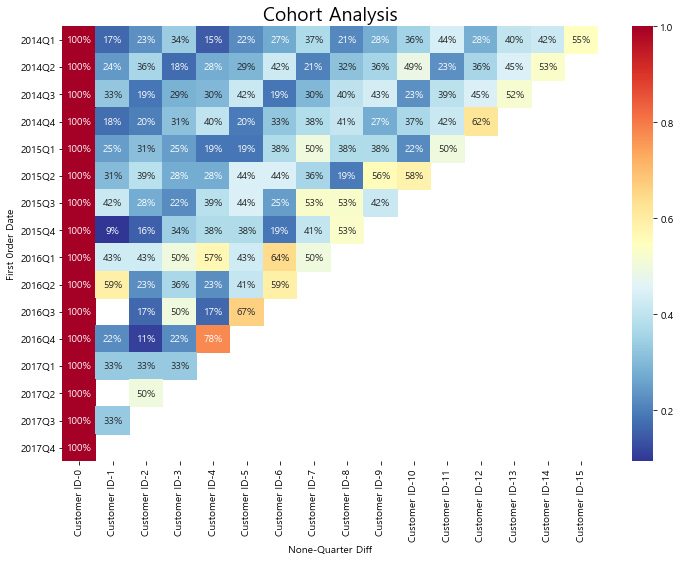

In [156]:
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('RdYlBu_r')
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%', cmap=cmap)
plt.show()